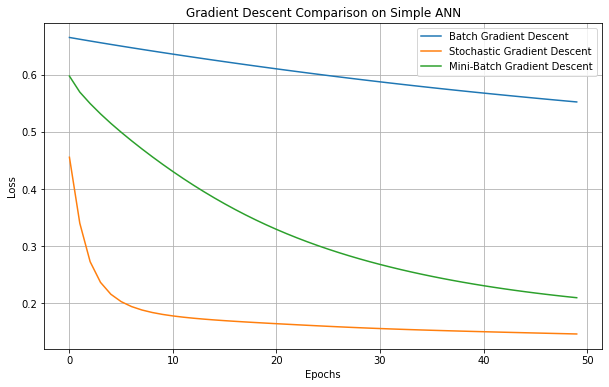

In [3]:
# One hidden layer

# Sigmoid activation

# Binary cross-entropy loss

# Three different training strategies

import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset (linearly separable)
np.random.seed(42)
num_samples_per_class = 100

# Class 0: centered at (1,1)
X0 = np.random.randn(num_samples_per_class, 2) + np.array([1, 1])
y0 = np.zeros((num_samples_per_class, 1))

# Class 1: centered at (3,3)
X1 = np.random.randn(num_samples_per_class, 2) + np.array([3, 3])
y1 = np.ones((num_samples_per_class, 1))

# Combine and shuffle
X = np.vstack((X0, X1))
y = np.vstack((y0, y1))
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Activation and loss functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# Training function
def train(X, y, method="batch", epochs=50, lr=0.1, batch_size=32):
    input_size = X.shape[1]
    hidden_size = 5
    output_size = 1

    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    loss_history = []

    for epoch in range(epochs):
        if method == "batch":
            X_batch, y_batch = X, y
            Z1 = X_batch @ W1 + b1
            A1 = sigmoid(Z1)
            Z2 = A1 @ W2 + b2
            A2 = sigmoid(Z2)

            dZ2 = A2 - y_batch
            dW2 = A1.T @ dZ2 / len(X_batch)
            db2 = np.mean(dZ2, axis=0, keepdims=True)

            dA1 = dZ2 @ W2.T
            dZ1 = dA1 * sigmoid_derivative(Z1)
            dW1 = X_batch.T @ dZ1 / len(X_batch)
            db1 = np.mean(dZ1, axis=0, keepdims=True)

            W2 -= lr * dW2
            b2 -= lr * db2
            W1 -= lr * dW1
            b1 -= lr * db1

        elif method == "stochastic":
            for i in range(len(X)):
                xi = X[i:i+1]
                yi = y[i:i+1]

                Z1 = xi @ W1 + b1
                A1 = sigmoid(Z1)
                Z2 = A1 @ W2 + b2
                A2 = sigmoid(Z2)

                dZ2 = A2 - yi
                dW2 = A1.T @ dZ2
                db2 = dZ2

                dA1 = dZ2 @ W2.T
                dZ1 = dA1 * sigmoid_derivative(Z1)
                dW1 = xi.T @ dZ1
                db1 = dZ1

                W2 -= lr * dW2
                b2 -= lr * db2
                W1 -= lr * dW1
                b1 -= lr * db1

        elif method == "mini-batch":
            for i in range(0, len(X), batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                Z1 = X_batch @ W1 + b1
                A1 = sigmoid(Z1)
                Z2 = A1 @ W2 + b2
                A2 = sigmoid(Z2)

                dZ2 = A2 - y_batch
                dW2 = A1.T @ dZ2 / len(X_batch)
                db2 = np.mean(dZ2, axis=0, keepdims=True)

                dA1 = dZ2 @ W2.T
                dZ1 = dA1 * sigmoid_derivative(Z1)
                dW1 = X_batch.T @ dZ1 / len(X_batch)
                db1 = np.mean(dZ1, axis=0, keepdims=True)

                W2 -= lr * dW2
                b2 -= lr * db2
                W1 -= lr * dW1
                b1 -= lr * db1

        # Track loss
        A2_all = sigmoid(sigmoid(X @ W1 + b1) @ W2 + b2)
        loss = binary_cross_entropy(y, A2_all)
        loss_history.append(loss)

    return loss_history

# Train using different methods
loss_batch = train(X, y, method="batch")
loss_sgd = train(X, y, method="stochastic")
loss_mini = train(X, y, method="mini-batch", batch_size=16)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(loss_batch, label="Batch Gradient Descent")
plt.plot(loss_sgd, label="Stochastic Gradient Descent")
plt.plot(loss_mini, label="Mini-Batch Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Gradient Descent Comparison on Simple ANN")
plt.legend()
plt.grid(True)
plt.show()
